## 선형회귀

### K-최근접 이웃 회귀 문제점 

- 긴본데이터 : http://bit.ly/perch_data

In [61]:
import numpy as np

In [62]:
# 농어[Perch]
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [63]:
perch_length.shape

(56,)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 분류는 입력이 (길이,무게) 쌍 타겟이 (도미, 빙어), 물고기종류를 예측
- 회귀는 입력 길이, 타겟 무게를 예측

In [65]:
# 훈련세트, 테스트세트 분리
# X_train, y_train, X_target, y_target 와 같이 많이 사용
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [66]:
# 값 입력시 2차원 배열이 되어야하기 때문에 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [67]:
# K-최근접 이웃회귀 
from sklearn.neighbors import KNeighborsRegressor

In [68]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [69]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [70]:
knr.score(test_input, test_target)

0.9746459963987609

In [71]:
knr.predict([[80,]])  # 80으로 해도 1033.3333 도출

array([1033.33333333])

- 농어 길이가 50cm가 되면 무게는 1033.3g 예측됨
- 실제 농어의 무게는 더 많이 나감

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 맑은코딕체로 변경
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [74]:
# 50cm 농어 최근접이웃 구하기
pred_perch = [[50,]]
distances, indexes = knr.kneighbors(pred_perch)

In [75]:
np.mean( train_target[indexes])

1033.3333333333333

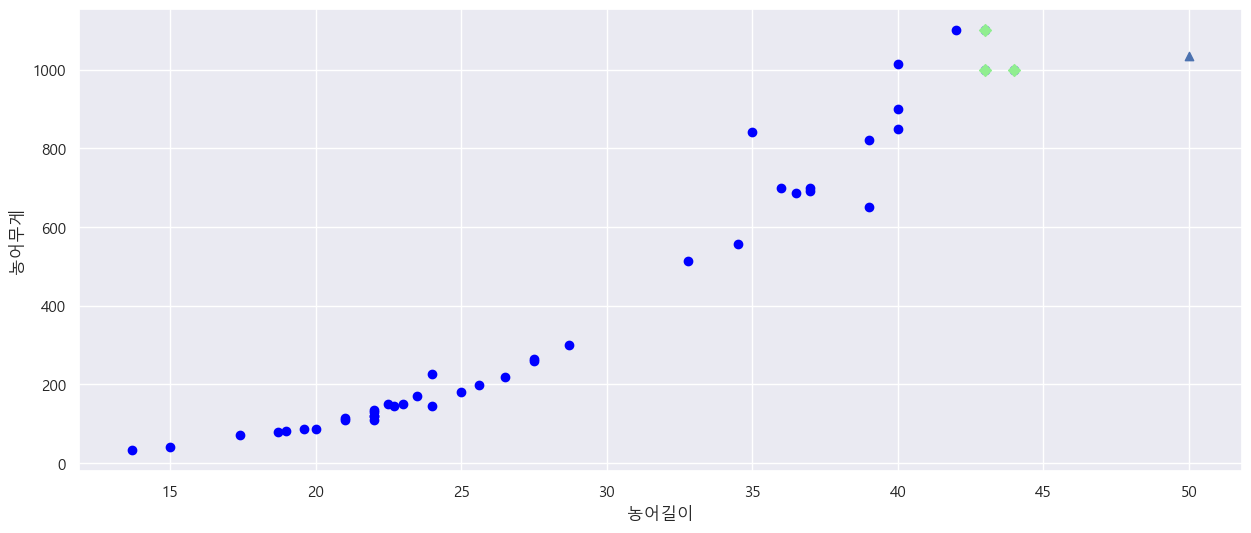

In [76]:

1033.3333333333333
# 농어훈련세트 산점도 그리기
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 훈련세트에서 최근접 이웃만 다시 표시
plt.scatter(train_input[indexes], train_target[indexes], marker='D', color='lightgreen', label='이웃데이터')
plt.scatter(50.0, 1033.3333, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()


### 선형회귀

- 대표적인 회귀 알고리즘. 직선을 학습하는 알고리즘
- 간단하고 성능이 뛰어남

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()
lr

LinearRegression()

In [79]:
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [80]:
lr.score(test_input, test_target)

0.824750312331356

In [81]:
lr.predict([[50,]])

array([1241.83860323])

- 50cm 농어는 1242.9g 정도 무게라고 예측됨

In [82]:
# 선형회귀 직선 방정식
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [83]:
lr.coef_ # 기울기, 가중치(weight)

array([39.01714496])

In [84]:
lr.intercept_ # 절편

-709.0186449535474

- 농어의 무게 = a x(농어길이) + b
    - a(기울기) -> 39.01714496
    - b(절편) -> -709.018644

In [85]:
(39.01714496 * 50.0) + (-709.0186449535474)

1241.8386030464528

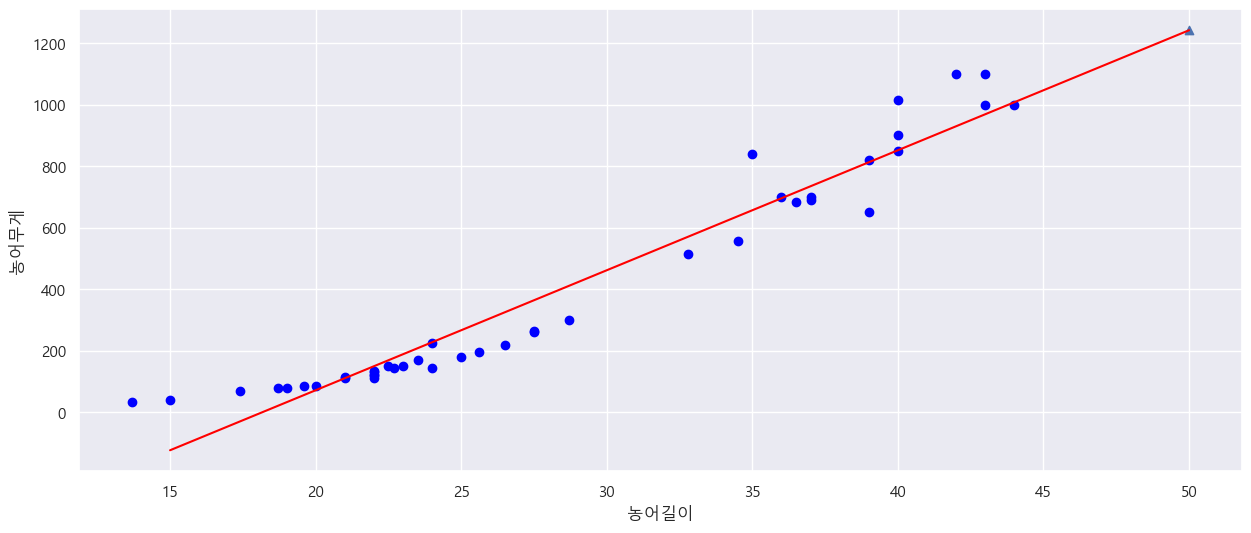

In [86]:
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 선형회귀 직선 그리기
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red')
plt.scatter(50.0, 1241.838, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()


In [87]:
lr.score(train_input, train_target)

0.9398463339976041

In [88]:
lr.score(test_input, test_target)

0.824750312331356

In [89]:
# 직선 방정식이 문제가 있다 물고기의 무게가 마이너스가 될수 없다 
lr.predict([[10, ]])

array([-318.84719532])

In [90]:
lr.predict([[9.8, ]])


array([-326.65062431])

### 다항 회귀
- 2차 방정식이 되어야 하기 때문

In [ ]:
train_poly = np.column_stack((train_input **2, train_input)) # column_stack 이건 두배열을나란히 붙인다 라고 생각하면 됨
test_poly = np.column_stack((test_input **2, test_input))

In [93]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [94]:
# 다항회귀 문제 해결
lr2 = LinearRegression()
lr2

LinearRegression()

In [96]:
# 길이 특성에대한 무게 결과를 훈련
lr2.fit(train_poly, train_target) 

LinearRegression()

In [97]:
# 다항회귀의 기울기 와 절편
print(lr2.coef_, lr2.intercept_) 

[  1.01433211 -21.55792498] 116.0502107827827


- 길이의 제곱에 들어갈 기울기 - 1.-1433211
- 길이의 들어갈 기울기 - -21.55792498
- 절편 - 116.0502107827827

In [98]:
# 농어길이 50cm에 대한 무게 예측
lr2.predict([[50**2, 50]])

array([1573.98423528])

In [99]:
# 예측된 값 == 기울기와 절편으로 다항식 계산 값
(1.01433211 * (50**2)) + (-21.55792498 * 50) + 116.0502107827827

1573.9842367827825

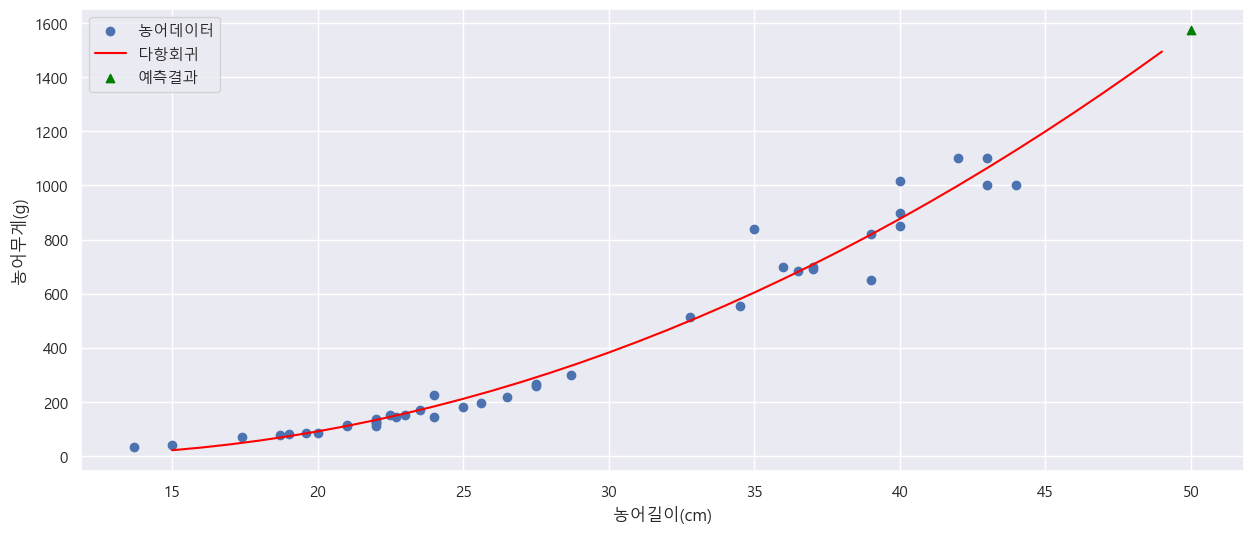

In [106]:
# 다항회귀 차트

# 구간별 직선을 그리기위해서 15~ 49까지 정수 배열생성
point = np.arange(15,50)

plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, label='농어데이터')
# 15에서 49 사이의 2차 방정식을 그래프로 그림
plt.plot(point, (1.01433211 * (point**2)) + (-21.55792498 * point) + 116.0502107827827, color='red',label='다항회귀')

# 50cm 농어 데이터 표시
plt.scatter([50],[1573.9842367827825],marker='^',color='green',label='예측결과')
plt.xlabel('농어길이(cm)')
plt.ylabel('농어무게(g)')
plt.legend()
plt.show() # 텍스트 필요없이 차트만 그려!

In [107]:
lr2.score(train_poly,train_target)

0.9706807451768623

In [108]:
lr2.score(test_poly, test_target)

0.9775935108325122

#### 결론 
- 직선 선형회귀 
    - 훈련세트 정확도 : 93.9%
    - 테스트세트 정확도 : 82.5%
- 다항회귀
    - 훈현세트 정확도 : 97.1%
    - 테스트세트 정확도 : 97.8%

- `선형회귀`는 특성(입력), 타겟 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는 것
    - 특성이 하나면 직선 방정식(단항) 방정식이 생성 

- 선형방적의 `계수(기울기/가중치)`와 `절편`이 저장
- `다항회귀`는 다항방정식으로 특성과 타겟의 관계를 나타냄
- `LinearRegression` - 가장 단순하고 정확도가 높음, 제일 많이 사용되고 있음